In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

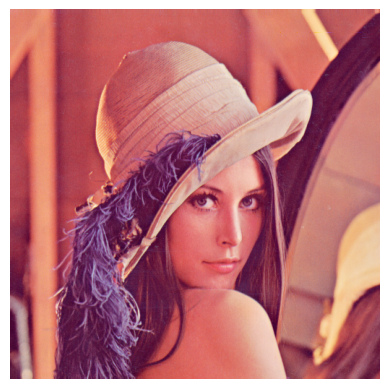

In [29]:
img = plt.imread("./pics/lena_color_512.tif") # تصویر را به صورت rgb وارد به میکنیم
plt.imshow(img)# تصویر را به صورت rgb نمایش میدهیم
plt.axis('off') # نمودار ها را محو میکنیم
plt.show()# نتیجه نهایی را نمایش میدهیم

In [30]:
height = img.shape[0] #y-axis تعداد پیکس های ارتفاع تصویر را مشخص میکنیم
width = img.shape[1] # تعداد پیکسل های عرض تصویر را مشخص میکنیم x-axis
print(height) # نمایش ارتفاع
print(width) # نمایش عرض

512
512


In [31]:
numHeight = int(height/16) # تعداد پیکسل های ارتفاع را به 16 تقسیم  میکنیم
numWidth = int(width/16) # تعداد پیکسل های عرض را به 16 تقسیم میکنیم
print(numHeight) # نمایش پیکسل های ارتفاع جدید
print(numWidth)# نمایش پیکسل های عرض جدید

32
32


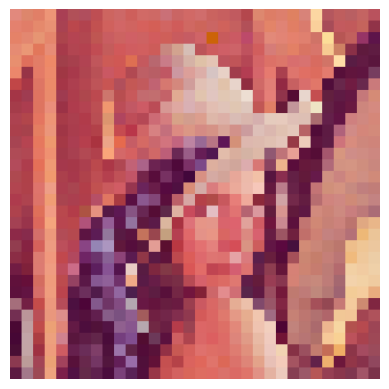

In [32]:
height, width = img.shape[:2] # ابعاد تصویر را به دست می آوریم و ستون عمودی را به ارتفاع و ستون افقی را به عرض میدهیم
block = 16 # این block به عنوان مبنا است و تعداد پیکس های لازم برای یکی کردن را نمایش میدهد

newImg = np.zeros((height, width, 3), np.uint8) # یک ماتریس صفر یا همان مشکی شامل ارتفاع و عرض تصویر ورودی میسازی که سه کانال دارد و هر کانال 8 بیتی میباشد

for i in range(0, height, block): # در این حلقه که یک حلقه تو در تو در خود دارد متغیر i بر روی ارتفاع حرکت میکند
    for j in range(0, width, block): # و در این حلقه متغیر j بر روی عرض حرکت میکند
        # pick top-left pixel of each block
        b, g, r = img[i, j] # گوشه ای ترین پیکس هر block را انتخاب میکنیم و به سه کانال آن مقادیر bgr را میدهیم

        # fill the entire block in the new image
        newImg[i:i+block, j:j+block] = [b, g, r]  # برای پیکسل گوشه و بالای هر block سه کانال تشکیل دادیم و حال آن کانال ها را به ناحیه یا همان block جدید خودمان میدهیم که با این تفاسیر رنگ آن با همان پیکسل اولیه یکی میباشد

plt.imshow(newImg)# تصویر جدید را رسم می کنیم 
plt.axis('off') # مختصات های آن را پاک میکنیم
plt.show() # نتیجه نهایی را نمایش میدهیم
# هر چقدر مقدار block بیشتر باشد ، وضوح تصویر کم تر میشود

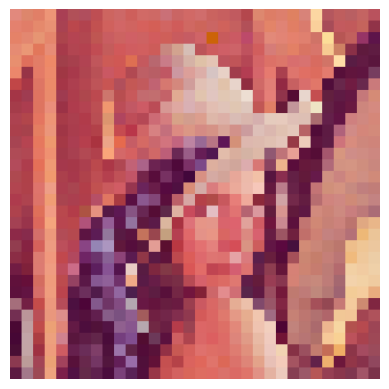

In [33]:
scale = 16
newImg2 = np.zeros((height, width, 3), np.uint8)

for i in range(height):
    for j in range(width):
        # nearest-neighbor source coordinate
        src_i = (i // scale) * scale # با این دو خط کد مختصات نزدیک ترین همسایه را انتخاب میکنیم ، در ضمن تقسیم صحیح صورت میگیرد
        src_j = (j // scale) * scale

        newImg2[i, j] = img[src_i, src_j]

plt.imshow(newImg2) # تصویر جدید را رسم میکنیم
plt.axis('off')# مختصات را محو میکنیم
plt.show()# نتیجه نهایی را رسم میکنیم

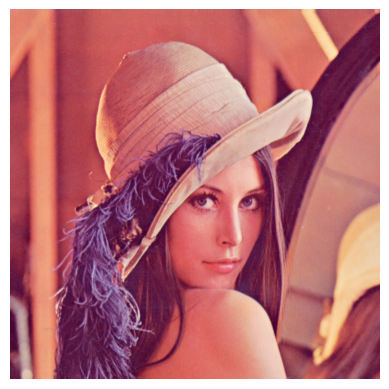

1024
1024


In [34]:
# upsample ×2

scale = 2   # upsample factor

upsampled = img.repeat(scale, axis=0).repeat(scale, axis=1) # در این خط کد ابتدا تمامی سطر ها را به اندازه n که برابر با مقدار scale است ، n برابر میکنیم و بعد به سراغ ستون ها میرویم و همین کار را انجام میدهیم 

plt.imshow(upsampled.astype(np.uint8))# تصویر مورد نظر را به صورت 8 بیتی در نظر میگیرم
plt.axis('off')# نمودار های مختصاتی را محو میکنیم
plt.show()# نتیجه نهایی را که تصویر بزرگ نمایی شده است را نمایش میدهیم

newHeight, newWidth = upsampled.shape[:2] # ارتفاع و عرض تصویر جدید را بدست می آوریم
print(newHeight) # ارتفاع تصویر جدید را نمایش میدهیم
print(newWidth) # عرض تصویر جدید را نمایش می دهیم

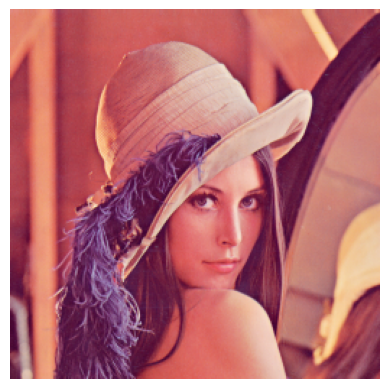

(256, 256)


In [35]:
# downsample ×2
scale = 2  # downsample factor

new_height = img.shape[0] // scale # ارتفاع جدید را محاسبه میکنیم
new_width = img.shape[1] // scale # عرض جدید را محاسبه میکنیم


downsampled = np.zeros((new_height, new_width, *img.shape[2:]), dtype=np.uint8) # سه ماتریس مشکی میسازیم که 8 بیتی میباشد

# میانگین‌گیری بلوک‌های ۲x۲
for i in range(new_height):
    for j in range(new_width):
        block = img[i*scale:(i+1)*scale, j*scale:(j+1)*scale] # بلوک های 4 تایی از تصویر اصلی را انتخاب میکنیم
        downsampled[i, j] = np.mean(block, axis=(0, 1)).astype(img.dtype) # حال برای هر بلاک از سطر ها و ستون های آن میانگین میگیریم

plt.imshow(downsampled.astype(np.uint8)) # تصویر جدید را به صورت 8 بیتی رسم میکنیم
plt.axis('off') # نمودار ها را محو میکنیم
plt.show()# نتیجه نهایی را نمایش میدهیم 
print(downsampled.shape[:2])# حال اندازه تصویر جدید را که همان کوچک نمایی است رسم میکنیم

In [36]:
a = [1,2,3,4,5,6,7,8,9]
print(a[:4])
print(a[4:])

[1, 2, 3, 4]
[5, 6, 7, 8, 9]
